In [2]:
from utils import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import (make_blobs, make_circles, make_moons, make_classification)
import pickle
from scipy.ndimage import label
from sklearn.preprocessing import MinMaxScaler
import matplotlib
import sklearn
import scipy

In [5]:
data1 = make_circles(factor=0.5, random_state=42, noise=0.05, n_samples=500)[0]
data2 = make_moons(n_samples=500, random_state=42, noise=0.05)[0]
data3 = make_blobs(n_samples=500, random_state=42, cluster_std=2)[0]
data4 = make_classification(n_samples=500, n_features=2, n_classes=3, n_redundant=0, n_clusters_per_class=1, random_state=42)[0]
scaler = MinMaxScaler(feature_range=(0, 1))
if len(data1.shape) == 1:
    data1 = data1.reshape(-1, 1)
data1 = scaler.fit_transform(data1)
if len(data2.shape) == 1:
    data2 = data2.reshape(-1, 1)
data2 = scaler.fit_transform(data2)
if len(data3.shape) == 1:
    data3 = data3.reshape(-1, 1)
data3 = scaler.fit_transform(data3)
if len(data4.shape) == 1:
    data4 = data4.reshape(-1, 1)
data4 = scaler.fit_transform(data4)

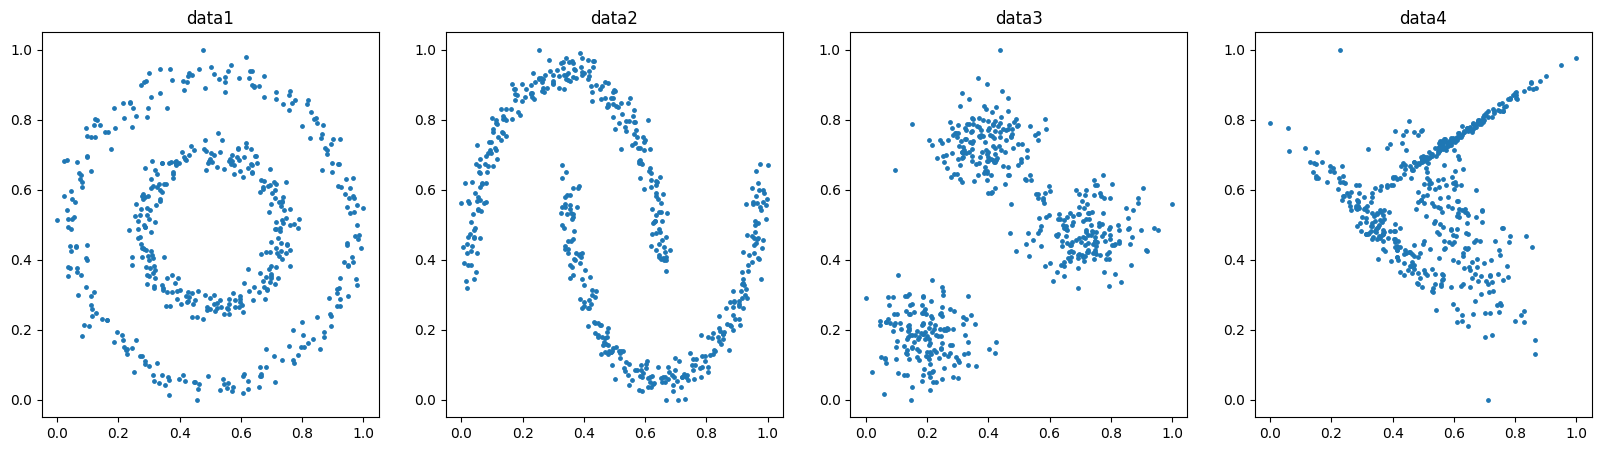

In [6]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.scatter(data1[:, 0], data1[:, 1], s=6)
plt.title('data1')

plt.subplot(1, 4, 2)
plt.scatter(data2[:, 0], data2[:, 1], s=6)
plt.title('data2')

plt.subplot(1, 4, 3)
plt.scatter(data3[:, 0], data3[:, 1], s=6)
plt.title('data3')

plt.subplot(1, 4, 4)
plt.scatter(data4[:, 0], data4[:, 1], s=6)
plt.title('data4')

plt.show()

In [7]:
def count_local_maxs(data, s, grid=400):
    x = np.linspace(0, 1, grid+1)
    y = np.linspace(0, 1, grid+1)
    x, y = np.meshgrid(x, y)

    z = np.zeros_like(x)
    for point in data:
        z += gaussian(x, y, point[0], point[1], s)

    delta = [[-1, 0], [1, 0], [0, -1], [0, 1]]

    local_maxs = 0

    for i in range(grid+1):
        for j in range(grid+1):
            flag = 1
            for d in delta:
                if 0 <= i+d[0] < grid+1 and 0 <= j+d[1] < grid+1:
                    if z[i+d[0], j+d[1]] > z[i, j]:
                        flag = 0
                        break
            if flag:
                local_maxs += 1

    return local_maxs

In [9]:
s_list = np.linspace(0.01, 0.5, 30)
maxcnt_4 = []
for s in s_list:
    maxcnt_4.append(count_local_maxs(data4, s, 400))

In [11]:
import pickle

data = {
    'maxcnt_1': maxcnt_1,
    'maxcnt_2': maxcnt_2,
    'maxcnt_3': maxcnt_3,
    'maxcnt_4': maxcnt_4
}

# Specify the file path to save the pickle file
file_path = 'maxcnt_variables.pkl'

# Save the variables as a pickle file
with open(file_path, 'wb') as file:
    pickle.dump(data, file)

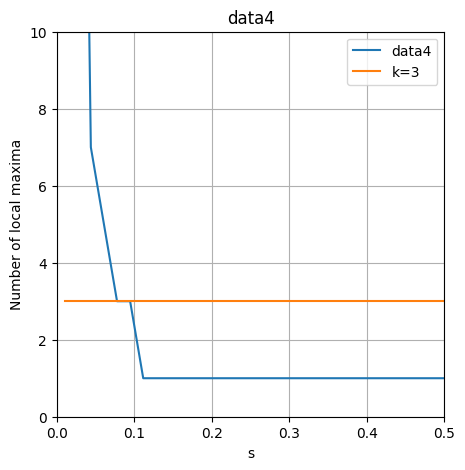

In [20]:
i = 3
plt.figure(figsize=(5, 5))
plt.plot(s_list, data[f'maxcnt_{i+1}'], label=f'data{i+1}')
plt.plot(s_list, 3*np.ones_like(s_list), label=f'k=3')
plt.grid()
plt.xlabel('s')
plt.ylabel('Number of local maxima')
plt.axis([0, 0.5, 0, 10])
plt.title(f'data{i+1}')
plt.legend()
plt.show()

In [21]:
s = 0.08

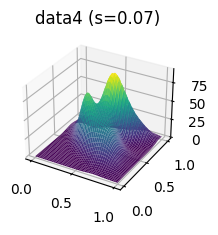

In [34]:
grid = 400
sub_list = [131, 132, 133, 144]
s_det = [0.02, 0.1, 0.05, 0.07]
title_list = [f'data1 (s={s_det[0]})', f'data2 (s={s_det[1]})', f'data3 (s={s_det[2]})', f'data4 (s={s_det[3]})']

fig = plt.figure(figsize=(10, 10))

i=3
data = data4
s = s_det[i]
title = title_list[i]
x = np.linspace(0, 1, grid+1)
y = np.linspace(0, 1, grid+1)
x, y = np.meshgrid(x, y)

z = np.zeros_like(x)
for point in data:
    z += gaussian(x, y, point[0], point[1], s)

ax = fig.add_subplot(sub_list[i], projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')
ax.set_title(title)

plt.show()

In [27]:
def simul_edge_custom(data, lim, grid, ball, sigma, hill_method=0, k=2): # grid//ball should be int
    X = data
    xlim, ylim = lim
    x = np.linspace(0, xlim, grid+1)
    y = np.linspace(0, ylim, grid+1)
    x, y = np.meshgrid(x, y)

    z = np.zeros_like(x)
    if hill_method == 0:
        for point in X:
            z += gaussian(x, y, point[0], point[1], sigma=sigma)
    elif hill_method == 1:
        for point in X:
            z += cone(x, y, point[0], point[1], sigma=sigma)

    # add ball
    ball_x = np.linspace(0, xlim, ball+1)
    ball_y = np.linspace(0, ylim, ball+1)
    ball_x, ball_y = np.meshgrid(ball_x, ball_y)

    ball_z = np.array([[z[i][j] for j in np.arange(0, grid+grid//ball, grid//ball)] for i in np.arange(0, grid+grid//ball, grid//ball)])

    # iter
    delta = [[-1, 0], [1, 0], [0, -1], [0, 1]]

    level = np.zeros((ball+3, ball+3))
    level[1:ball+2, 1:ball+2] = ball_z.copy()

    level_bin = np.zeros((ball+3, ball+3))
    level_bin[1:ball+2, 1:ball+2] = np.ones((ball+1, ball+1))

    edge = np.zeros((ball+3, ball+3))

    temp_clusters = []

    clusters_array = [temp_clusters]
    level_array = [level.copy()]
    level_bin_array = [level_bin]
    edge_array = []

    gen = 1
    edge = []

    reach_to_k = 0

    f1 = 1
    f2 = 1

    while np.any(level_bin == 1):
        if f1:
            f1 = 0
        else:
            if not reach_to_k:
                clusters, k_ = label(level_bin[1:-1, 1:-1] == 0)
                if k_ <= k:
                    reach_to_k = 1

        if not reach_to_k:
            temp = level.copy()
            temp_bin = level_bin.copy()
            for i in range(1, ball+2):
                for j in range(1, ball+2):
                    if not temp_bin[i, j]: continue
                    flag = 1
                    for d in delta:
                        if level[i+d[0], j+d[1]] > level[i, j]:  # 부등호에서 등호 삭제(edge 처리 문제)
                            flag = 0
                            break
                    if flag:
                        temp[i, j] = 0
                        temp_bin[i, j] = 0
        else:
            if f2:
                f2 = 0
                pad = np.zeros((ball+3, ball+3))
                pad[1:-1, 1:-1] = clusters
                clusters = pad.copy()
                clusters = clusters.astype(np.uint8)
            temp = level.copy()
            temp_bin = level_bin.copy()
            temp_clusters = clusters.copy()
            for i in range(1, ball+2):
                for j in range(1, ball+2):
                    if not temp_bin[i, j]: continue
                    flag = 1
                    for d in delta:
                        if level[i+d[0], j+d[1]] > level[i, j]:  # 부등호에서 등호 삭제(edge 처리 문제)
                            flag = 0
                            break
                    if flag:
                        types = []
                        for d in delta:
                            if 0<i+d[0] and i+d[0]<ball+2 and 0<j+d[1] and j+d[1]<ball+2: # ball+3 to ball+2
                                if temp_bin[i+d[0], j+d[1]] == 0:
                                    types.append(temp_clusters[i+d[0], j+d[1]])
                        if 0 in types: types.remove(0)
                        f3 = 0
                        if len(set(types)) > 1:
                            edge.append([i, j])
                            f3 = 1
                        temp[i, j] = 0
                        if f3:
                            temp_bin[i, j] = 0.5
                        else:
                            temp_bin[i, j] = 0
                        temp_clusters[i, j] = 0 if not types else types[0]

        gen += 1
        level_array.append(temp)

        level_bin_array.append(temp_bin)
        clusters_array.append(temp_clusters)

        level = temp
        level_bin = temp_bin
        clusters = temp_clusters

    bin_array = level_bin.copy()

    return level_bin_array, edge

def plot_level_custom(level_bin_array, size1=1):
    gen_num = len(level_bin_array)
    rows = gen_num//5//5 + 1
    plt.figure(figsize=(size1*5, size1*rows))

    for i in range(len(level_bin_array)):
        if i%5 == 0:
            plt.subplot(rows, 5, i//5+1)
        else: continue
        plt.title(f"gen : {i}")
        plt.axis("off")
        plt.imshow(level_bin_array[i][::-1], cmap='gray', vmin=0, vmax=1)

    plt.show()

In [62]:
level_bin_array4, edge4 = simul_edge_custom(data4, lim=(1, 1), grid=400, ball=100, sigma=0.06, k=4)

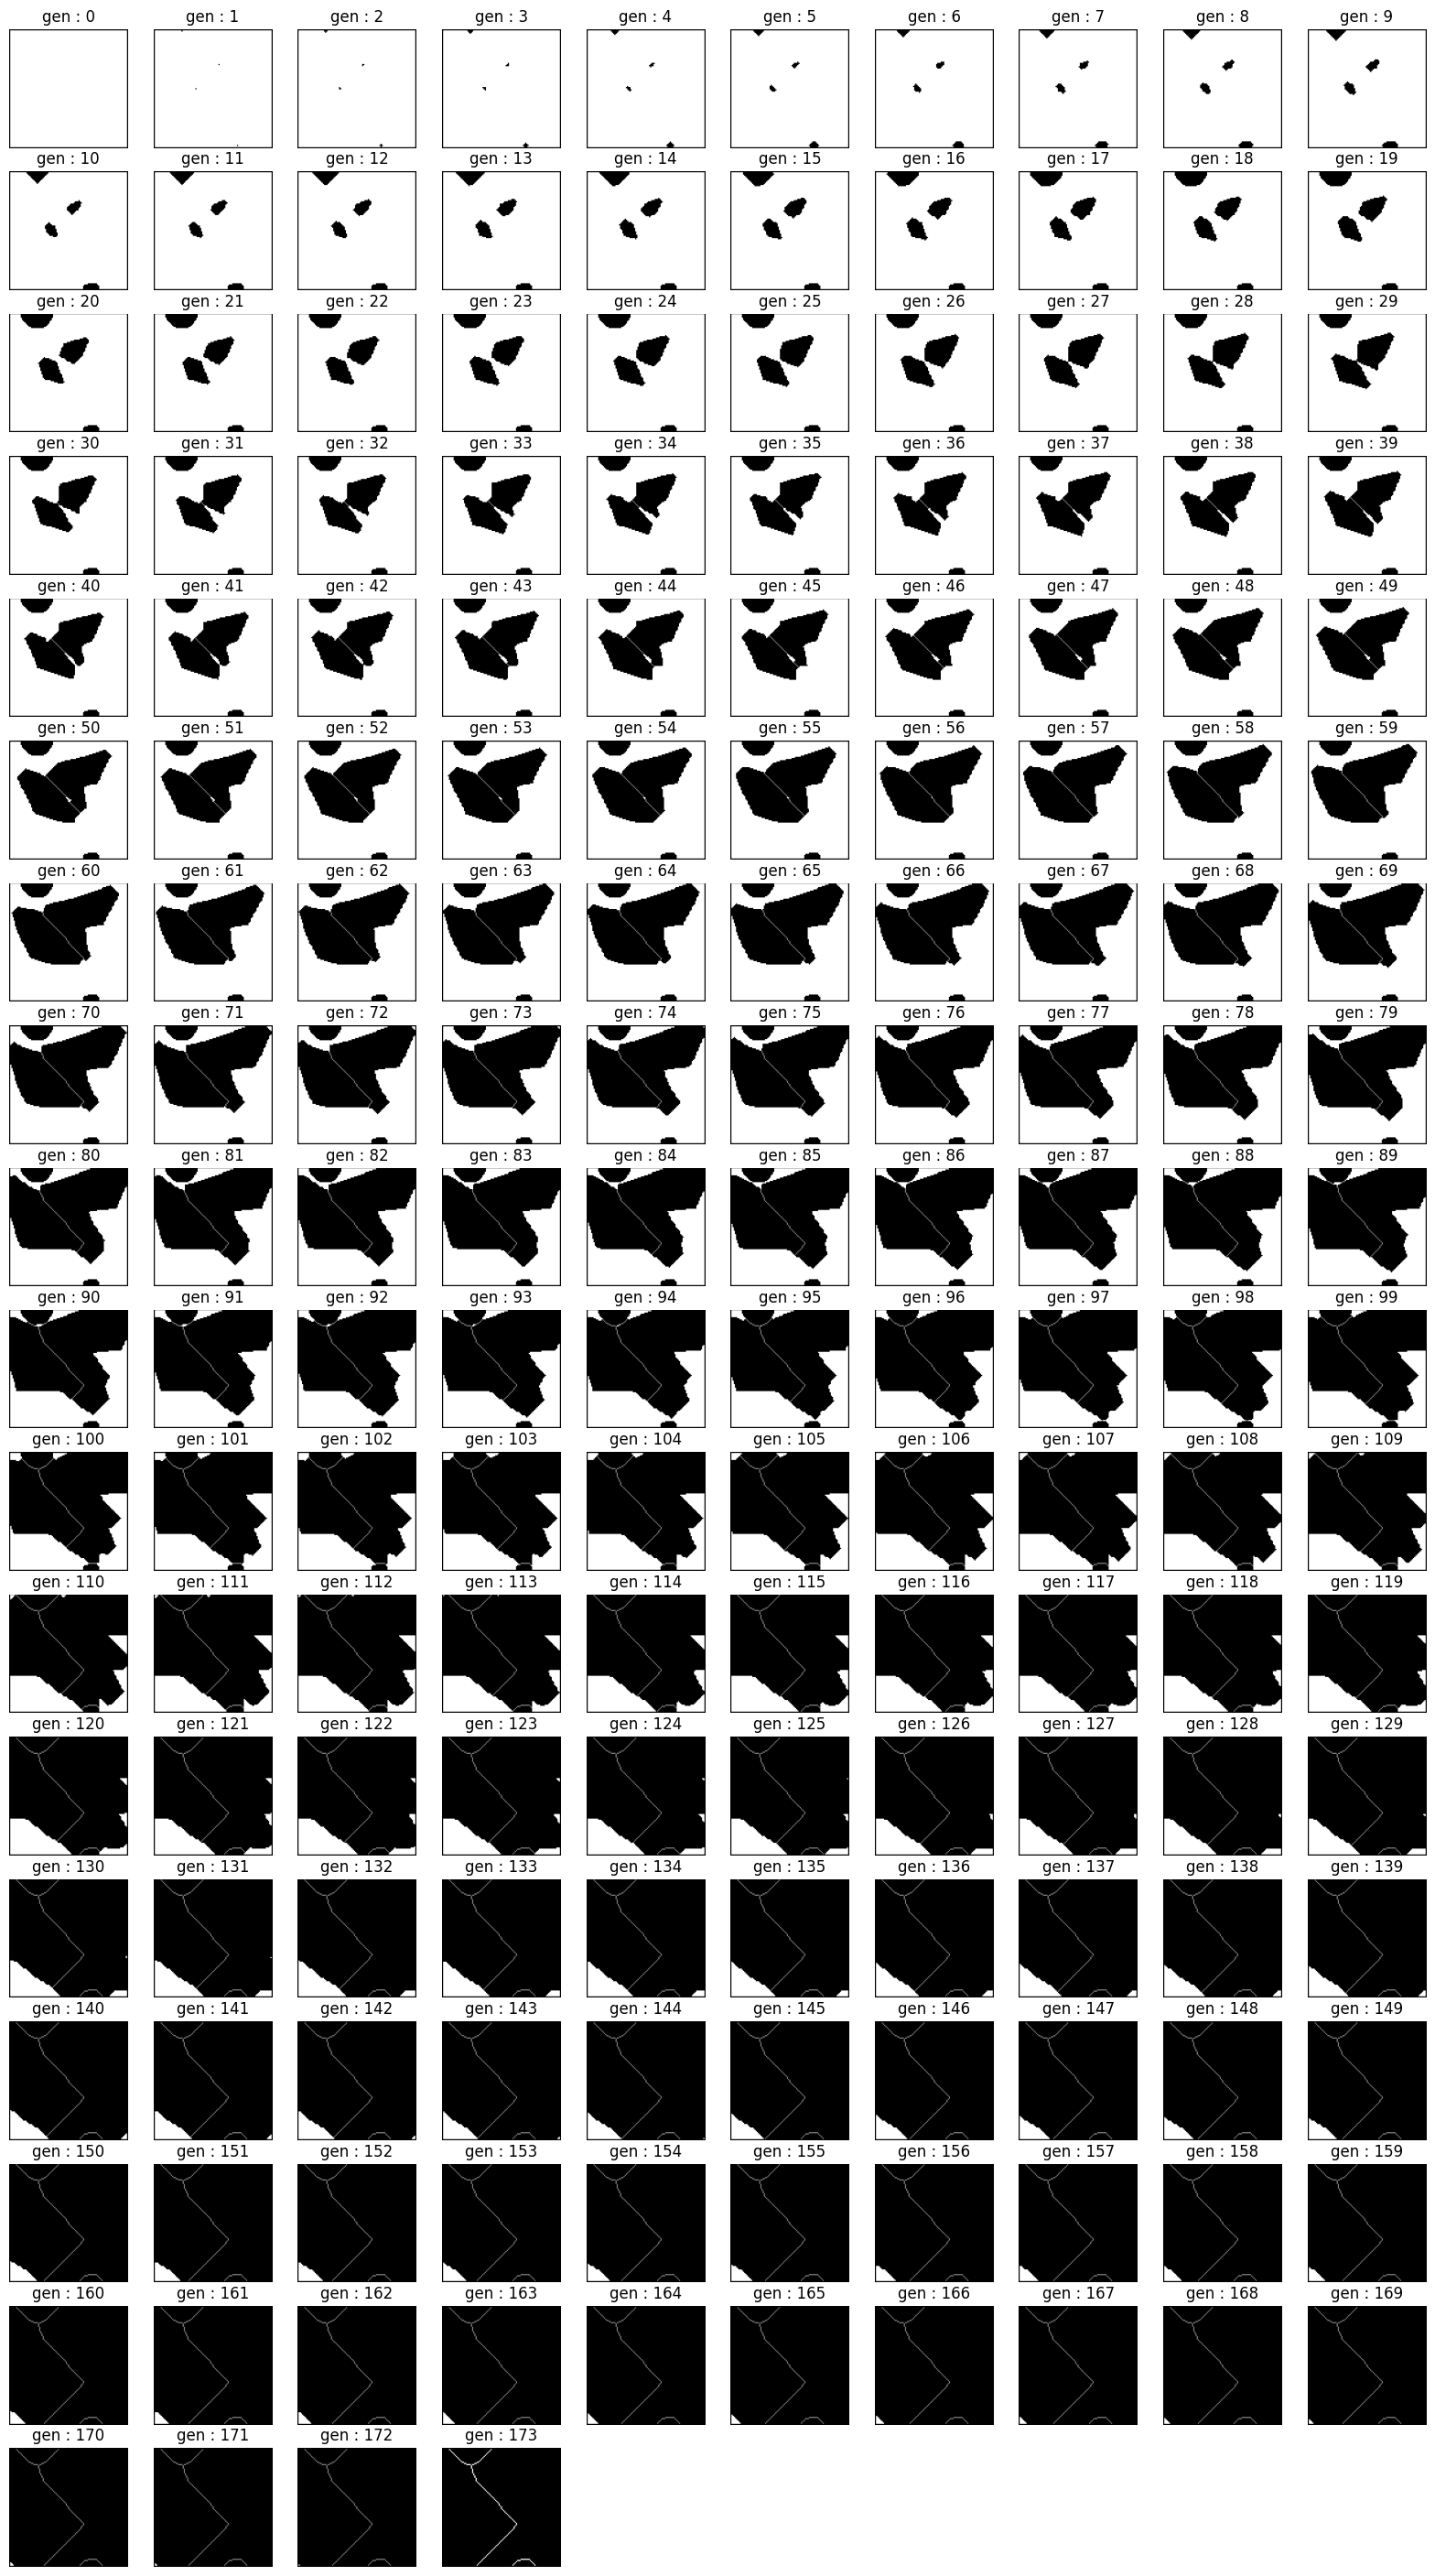

In [66]:
plot_level(level_bin_array4, size1=2)

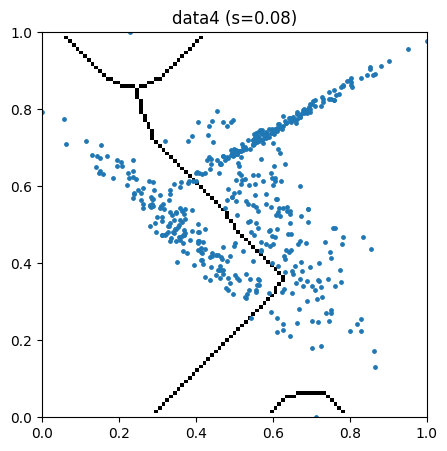

In [64]:
sub_list = [131, 132, 133, 144]
s_det = [0.02, 0.1, 0.05, 0.08]
title_list = [f'data1 (s={s_det[0]})', f'data2 (s={s_det[1]})', f'data3 (s={s_det[2]})', f'data4 (s={s_det[3]})']
# edge_list = [edge1, edge2, edge3, edge4]

fig = plt.figure(figsize=(5, 5))

i = 3
data = data4
edge = edge4
s = s_det[i]
title = title_list[i]

edge_array = [[1 for _ in range(103)] for _ in range(103)]
for i, j in edge:
    edge_array[i][j] = 0
edge_array = np.array(edge_array)
data = np.array(data)
plt.imshow(~edge_array[::-1], cmap='binary', extent=[0, 1, 0, 1])
plt.scatter(data[:, 0], data[:, 1], s=6)
plt.title(title)

plt.show()